In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
1827,3/1/2019,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1826,3/2/2019,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1825,3/3/2019,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1824,3/4/2019,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1823,3/5/2019,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%
...,...,...,...,...,...,...,...
4,2/26/2024,"54,484.60","51,728.80","54,891.10","50,925.90",51.25K,5.34%
3,2/27/2024,"57,037.30","54,476.50","57,542.40","54,452.90",67.20K,4.69%
2,2/28/2024,"62,451.10","57,040.00","63,890.00","56,698.00",118.76K,9.49%
1,2/29/2024,"61,153.10","62,438.20","63,659.80","60,520.60",78.40K,-2.08%


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1828 entries, 1827 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1828 non-null   datetime64[ns]
 1   Price     1828 non-null   float64       
 2   Open      1828 non-null   object        
 3   High      1828 non-null   object        
 4   Low       1828 non-null   object        
 5   Vol.      1828 non-null   object        
 6   Change %  1828 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 114.2+ KB


In [4]:
df.set_index('Date',inplace=True)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,3823.2,"3,813.60","3,856.30","3,813.40",22.28K,0.24%
2019-03-02,3820.0,"3,820.50","3,840.40","3,775.00",18.49K,-0.08%
2019-03-03,3806.4,"3,820.30","3,834.70","3,784.80",15.99K,-0.36%
2019-03-04,3715.0,"3,807.80","3,828.00","3,674.90",32.61K,-2.40%
2019-03-05,3857.5,"3,716.10","3,876.00","3,705.40",30.82K,3.83%
...,...,...,...,...,...,...
2024-02-26,54484.6,"51,728.80","54,891.10","50,925.90",51.25K,5.34%
2024-02-27,57037.3,"54,476.50","57,542.40","54,452.90",67.20K,4.69%
2024-02-28,62451.1,"57,040.00","63,890.00","56,698.00",118.76K,9.49%


In [5]:
df = df[['Price']]
df.head()

,Price
Date,
2019-03-01,3823.2
2019-03-02,3820.0
2019-03-03,3806.4
2019-03-04,3715.0
2019-03-05,3857.5


<Axes: xlabel='Date', ylabel='Price'>

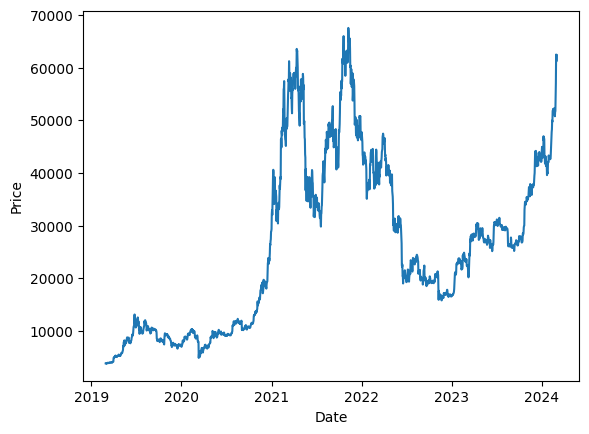

In [6]:
sns.lineplot(data = df, x = df.index, y = df['Price'])

In [7]:
#test the stationarity
def test_stationarity(data_frame, variable):
    from statsmodels.tsa.stattools import adfuller
    adfuller_test = adfuller(data_frame[variable], autolag = 'AIC')
    statistics  = pd.Series(adfuller_test[0:4], index = ['t-statistics', 'p-value', 'lags_used', 'number of observations used'])
    print(statistics)
    
    for key,values in adfuller_test[4].items():
        print('Criticality', key, ":", values)

In [8]:
test_stationarity(df, 'Price')

t-statistics                     -0.978718
p-value                           0.760947
lags_used                         9.000000
number of observations used    1818.000000
dtype: float64
Criticality 1% : -3.4339520666978056
Criticality 5% : -2.8631311116872475
Criticality 10% : -2.567617054512932


In [9]:
df['diff_1'] = df['Price'].diff(1)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\3664274677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_1'] = df['Price'].diff(1)


,Price,diff_1
Date,,
2019-03-01,3823.2,NaN
2019-03-02,3820.0,-3.2
2019-03-03,3806.4,-13.6
2019-03-04,3715.0,-91.4
2019-03-05,3857.5,142.5
...,...,...
2024-02-26,54484.6,2761.6
2024-02-27,57037.3,2552.7
2024-02-28,62451.1,5413.8


In [10]:
test_stationarity(df.dropna(),'diff_1')

t-statistics                  -1.330485e+01
p-value                        6.930459e-25
lags_used                      8.000000e+00
number of observations used    1.818000e+03
dtype: float64
Criticality 1% : -3.4339520666978056
Criticality 5% : -2.8631311116872475
Criticality 10% : -2.567617054512932


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

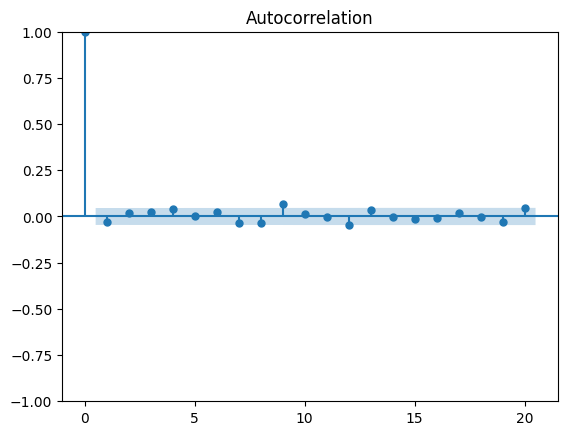

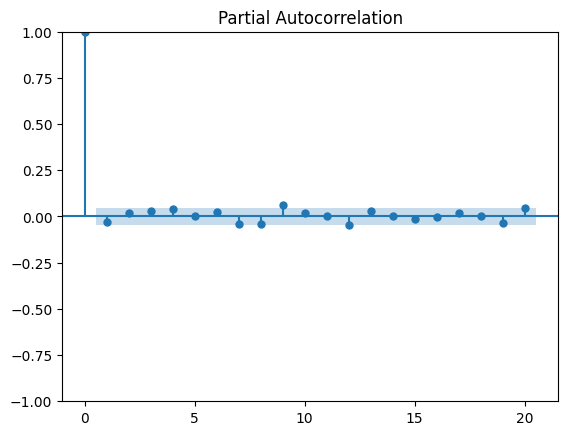

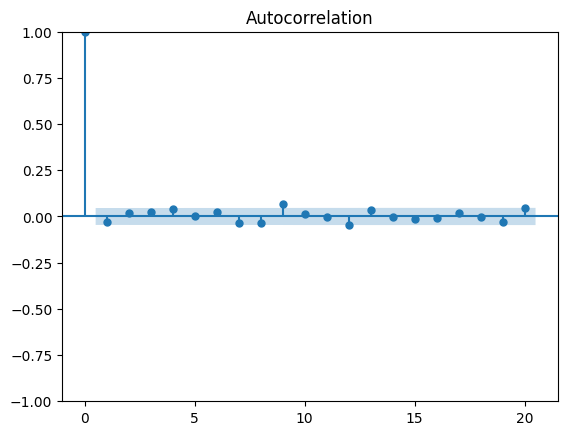

In [12]:
plot_pacf(df['diff_1'].dropna(),lags=20)
plot_acf(df['diff_1'].dropna(),lags=20)

In [13]:
train_data = df[:round(len(df)*70/100)]
test_data = df[round(len(df)*70/100):round(len(df)*90/100)]
val_data = df[round(len(df)*90/100):]

In [14]:
model = ARIMA(train_data['Price'], order = (9,1,9))
model_fit = model.fit()
model_fit.summary()

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1280
Model:                 ARIMA(9, 1, 9)   Log Likelihood              -10836.318
Date:                Mon, 06 May 2024   AIC                          21710.635
Time:                        23:05:05   BIC                          21808.558
Sample:                    03-01-2019   HQIC                         21747.406
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1474      1.081      0.136      0.892      -1.972       2.267
ar.L2          0.1422      0.711      0.200      0.841      -1.251       1.536
ar.L3         -0.4105      0.230     -1.785      0.074      -0.861       0.040
ar.L4          0.6282      0.352      1.784      0.074      -0.062       1.318
ar.L5          0.0148      0.861      0.017      0.986      -1.672       1.702
ar.L6         -0.5311      0.408     -1.303      0.193      -1.330       0.268
ar.L7          0.4008      0.363      1.103      0.270      -0.312       1.113
ar.L8         -0.4773      0.628     -0.760      0.447      -1.708       0.753
ar.L9         -0.3789      0.851     -0.445      0.656      -2.047       1.289
ma.L1         -0.1855      1.072     -0.173      0.863      -2.287       1.916
ma.L2         -0.1307      0.755     -0.173      0.862      -1.610       1.349
ma.L3          0.4240      0.270      1.570      0.116      -0.105       0.953
ma.L4         -0.6021      0.332     -1.814      0.070      -1.253       0.048
ma.L5          0.0048      0.823      0.006      0.995      -1.609       1.619
ma.L6          0.5560      0.420      1.323      0.186      -0.268       1.380
ma.L7         -0.4852      0.374     -1.297      0.195      -1.218       0.248
ma.L8          0.4961      0.718      0.691      0.490      -0.911       1.903
ma.L9          0.4334      0.921      0.470      0.638      -1.373       2.239
sigma2      1.396e+06   3.24e+04     43.092      0.000    1.33e+06    1.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1870.09
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              14.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
prediction = model_fit.predict(start = test_data.index[0], end = test_data.index[-1])
prediction_val = model_fit.predict(start = val_data.index[0],end = val_data.index[-1])
df['prediction'] = prediction
df['prediction_val'] = prediction_val

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\2694196774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = prediction
C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\2694196774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction_val'] = prediction_val


Text(0, 0.5, 'Price')

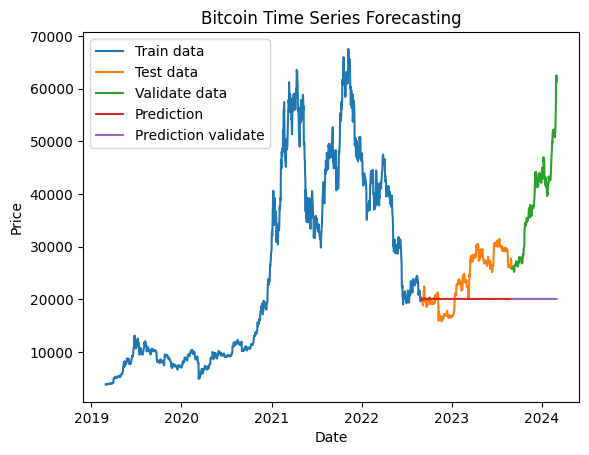

In [16]:
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Price'],label='Train data')
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Price'],label='Test data')
sns.lineplot(data=val_data, x=val_data.index, y=val_data['Price'],label='Validate data')
sns.lineplot(data=df, x=df.index, y=df['prediction'],label='Prediction')
sns.lineplot(data=df, x=df.index, y=df['prediction_val'],label='Prediction validate')
plt.title('Bitcoin Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')